In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, IntegerType, StringType

In [2]:
spark = SparkSession.builder.appName("ReadAndWrite")\
       .config("spark.hadoop.fs.file.impl", "org.apache.hadoop.fs.LocalFileSystem").getOrCreate()

## Reading Data From CSV File

In [3]:
myschema = StructType([
    StructField("UserID",IntegerType(),True),
    StructField("Name",StringType(),True),
    StructField("Age",IntegerType(),True),
    StructField("Friends",IntegerType(),True)
])

In [4]:
data = spark.read.format("csv")\
    .schema(myschema)\
    .option("path","fakefriends.csv")\
    .load()
data.show(3)

+------+--------+---+-------+
|UserID|    Name|Age|Friends|
+------+--------+---+-------+
|     0|    Will| 33|    385|
|     1|Jean-Luc| 26|      2|
|     2|    Hugh| 55|    221|
+------+--------+---+-------+
only showing top 3 rows



In [5]:
data.printSchema()

root
 |-- UserID: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Friends: integer (nullable = true)



## Writing output to a new file

In [6]:
output = data.select('*')\
         .where(data.Age < 30)\
         .orderBy(data.UserID)
output.show(4)

+------+--------+---+-------+
|UserID|    Name|Age|Friends|
+------+--------+---+-------+
|     1|Jean-Luc| 26|      2|
|     9|    Hugh| 27|    181|
|    16|  Weyoun| 22|    323|
|    21|   Miles| 19|    268|
+------+--------+---+-------+
only showing top 4 rows



In [7]:
output.count()

112

### Writing Using Pandas

In [23]:
import pandas as pd
df = output.toPandas()
df.to_csv("output.csv",index=False)

### Writing Using Pyspark

#### PySpark partitions enable the division of large datasets into smaller segments using partition keys, enhancing parallel processing. Unlike Pandas DataFrames, PySpark optimally manages memory by distributing data across partitions, facilitating faster parallel transformations, a key advantage for big data processing.

In [11]:
output.write.format("csv").mode("overwrite")\
.option("path","file:///output/").partitionBy("age").save()# supported formats = parquet , json , avro , orc

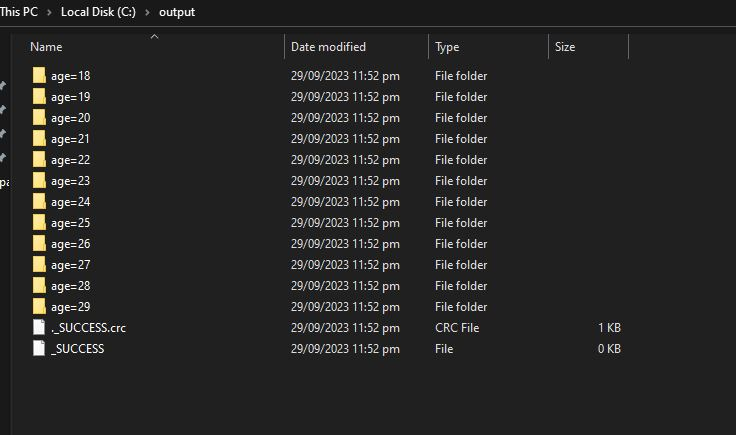